<a href="https://www.kaggle.com/code/gregoriusbayuaji/what-should-we-consider-when-we-bought-a-house?scriptVersionId=121339709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melb-data/melb_data.csv


If we want to buy a house

# Data Describing

In [2]:
df = pd.read_csv('../input/melb-data/melb_data.csv')
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [4]:
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Notes on Specific Variables

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

# Handling Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

From the list above we can see that there are so many missing values. We will handle it one by one

### 1. Lattitude, Longitude, Distance, Postcode, and Regionname

Lattitude, Longitude, Distance, Postcode, and Regionname are fixed variables. We can't change them. So, we need to delete them.

In [6]:
df[df['Lattitude'].isna()]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
9,16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
12,19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
13,21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
14,22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,23495,Templestowe Lower,1/207 Manningham Rd,2,u,550000.0,PI,Barry,26/08/2017,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,5420.0
18362,23499,Thornbury,1/128 Dundas St,2,t,770000.0,PI,McGrath,26/08/2017,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
18365,23502,Thornbury,111 Pender St,2,t,858000.0,S,Jellis,26/08/2017,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
18366,23508,Toorak,21/1059 Malvern Rd,2,u,720000.0,VB,Beller,26/08/2017,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7217.0


We can see that if Lattitude is null, Longitude, Distance, Postcode, and Regionname are also null. So we can just drop Lattitude, and after that they're all will also be dropped.

In [7]:
df.dropna(subset = ['Lattitude'], inplace = True)
df.isnull().sum()

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2          159
Bathroom          161
Car               266
Landsize         1483
BuildingArea     7311
YearBuilt        6114
CouncilArea      2853
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 2. Landsize and BuildingArea

If we can't describe area, that means probably there is no home. So, if there is no area data, we should delete it.

In [8]:
df.dropna(subset = ['Landsize'], inplace = True)
df.dropna(subset = ['BuildingArea'], inplace = True)
df.isnull().sum()

Unnamed: 0         0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car               29
Landsize           0
BuildingArea       0
YearBuilt        272
CouncilArea      684
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

### 3. Car

From that data we can see that some house area has no data about car garage. Because of that, and also the numbers of that kind of data is so small, we can just assumed that home has 0 car garage/car park.

In [9]:
df['Car'] = df['Car'].fillna(0)
df.isnull().sum()

Unnamed: 0         0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt        272
CouncilArea      684
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

### 4. CouncilArea

In [10]:
df['CouncilArea'] = df['CouncilArea'].fillna('No Data')
df.isnull().sum()

Unnamed: 0         0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt        272
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

### 5. Year Built

We can assume the no year built data is the average of the total yearbuilt

In [11]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())


The final numbers of non-null data can be shown below

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7130 entries, 1 to 18394
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7130 non-null   int64  
 1   Suburb         7130 non-null   object 
 2   Address        7130 non-null   object 
 3   Rooms          7130 non-null   int64  
 4   Type           7130 non-null   object 
 5   Price          7130 non-null   float64
 6   Method         7130 non-null   object 
 7   SellerG        7130 non-null   object 
 8   Date           7130 non-null   object 
 9   Distance       7130 non-null   float64
 10  Postcode       7130 non-null   float64
 11  Bedroom2       7130 non-null   float64
 12  Bathroom       7130 non-null   float64
 13  Car            7130 non-null   float64
 14  Landsize       7130 non-null   float64
 15  BuildingArea   7130 non-null   float64
 16  YearBuilt      7130 non-null   float64
 17  CouncilArea    7130 non-null   object 
 18  Lattitu

# Data Cleansing

### 1. Outlier

In [13]:
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,7130.000000,7130.000000,7.130000e+03,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000
mean,10804.751332,2.977419,1.079923e+06,10.140968,3104.428892,2.950631,1.599860,1.604628,490.469425,151.967650,1964.210849,-37.808050,144.991662,7431.721459
std,6518.280420,0.970989,6.746922e+05,6.024132,91.845891,0.971080,0.720363,0.948857,1041.681066,541.014538,37.131520,0.080114,0.105051,4344.954352
min,2.000000,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,5152.750000,2.000000,6.310000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,164.000000,93.000000,1940.000000,-37.856797,144.925485,4385.000000
50%,10440.000000,3.000000,8.950000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,400.000000,126.000000,1968.000000,-37.802400,144.996800,6567.000000
75%,16492.750000,4.000000,1.335000e+06,13.000000,3148.000000,4.000000,2.000000,2.000000,638.750000,174.000000,1998.000000,-37.756978,145.056000,10175.000000
max,23545.000000,8.000000,9.000000e+06,48.100000,3977.000000,9.000000,8.000000,10.000000,44500.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


From the table, we can see that there are 4 variables with too much difference between maximum value and q3 value. Those are Landsize, BuildingArea, YearBuilt, and PropertyCount. We need to check those variables to delete its outliers

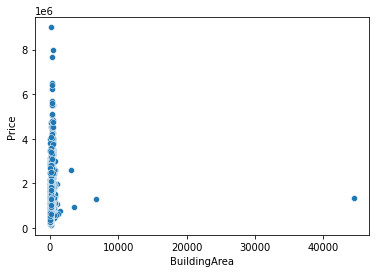

In [14]:
sns.scatterplot(data = df, x = 'BuildingArea', y = 'Price')
plt.show()

In [15]:
Building1 = df[df['BuildingArea'] > 1400].index
df.drop(Building1, inplace = True)

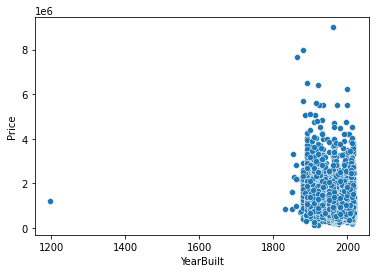

In [16]:
sns.scatterplot(data = df, x = 'YearBuilt', y = 'Price')
plt.show()

In [17]:
Year1 = df[df['YearBuilt'] < 1800].index
df.drop(Year1, inplace = True)

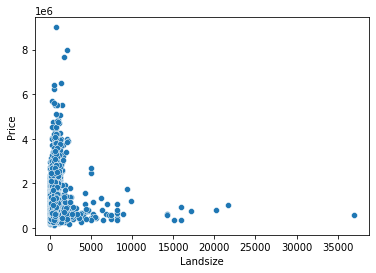

In [18]:
sns.scatterplot(data = df, x = 'Landsize', y = 'Price')
plt.show()

In [19]:
Landsize1 = df[df['Landsize'] > 12000].index
df.drop(Landsize1, inplace = True)

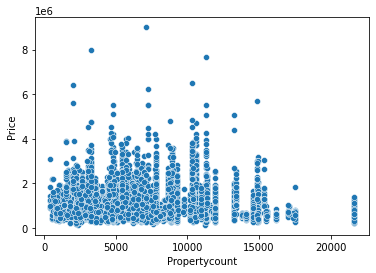

In [20]:
sns.scatterplot(data = df, x = 'Propertycount', y = 'Price')
plt.show()

In [21]:
Property1 = df[df['Propertycount'] > 20000].index
df.drop(Property1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 1 to 18394
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6941 non-null   int64  
 1   Suburb         6941 non-null   object 
 2   Address        6941 non-null   object 
 3   Rooms          6941 non-null   int64  
 4   Type           6941 non-null   object 
 5   Price          6941 non-null   float64
 6   Method         6941 non-null   object 
 7   SellerG        6941 non-null   object 
 8   Date           6941 non-null   object 
 9   Distance       6941 non-null   float64
 10  Postcode       6941 non-null   float64
 11  Bedroom2       6941 non-null   float64
 12  Bathroom       6941 non-null   float64
 13  Car            6941 non-null   float64
 14  Landsize       6941 non-null   float64
 15  BuildingArea   6941 non-null   float64
 16  YearBuilt      6941 non-null   float64
 17  CouncilArea    6941 non-null   object 
 18  Lattitu

### 2. Data with too many variances

In [23]:
Unclear = df[['Unnamed: 0', 'Date', 'Address']]
df.drop(Unclear, axis = 1, inplace = True)

We drop 'Unnamed: 0' and 'Address' because their values are different in every house. I also drop 'Date' because 'Date' value can not be encoded, and it also has too many variance.

### 3. Tiered Data

In [24]:
Tiered = df[['Lattitude', 'Longtitude', 'CouncilArea']]
df.drop(Tiered, axis = 1, inplace = True)

### 4. Multicollinerarity

The last thing we need to consider when do data cleansing is multicollinearity.

In [25]:
corrmat = df.corr()

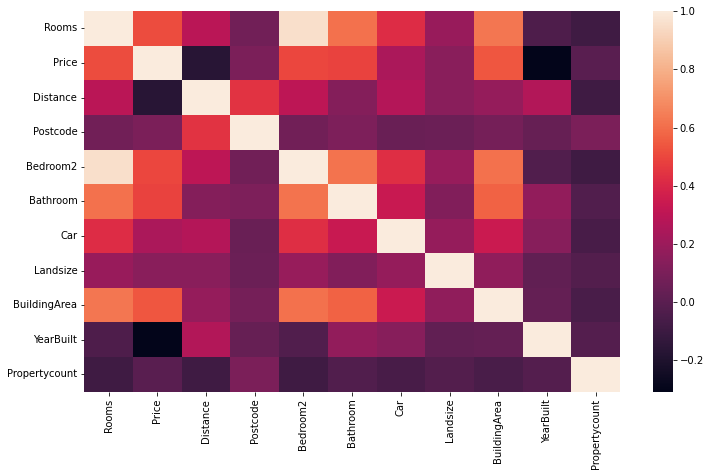

In [26]:
plt.figure(figsize = (12,7))
sns.heatmap(corrmat)
plt.show()

From the heatmap above we can see that there is also a collinerarity between 'Rooms' and 'Bedroom2'. So we need to drop one of them, because of 'Rooms' has more collinerarity to 'Price, we drop 'Bedroom2'

In [27]:
Multi = df[['Bedroom2']]
df.drop(Multi, axis = 1, inplace = True)

# Feature Encoding



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 1 to 18394
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6941 non-null   object 
 1   Rooms          6941 non-null   int64  
 2   Type           6941 non-null   object 
 3   Price          6941 non-null   float64
 4   Method         6941 non-null   object 
 5   SellerG        6941 non-null   object 
 6   Distance       6941 non-null   float64
 7   Postcode       6941 non-null   float64
 8   Bathroom       6941 non-null   float64
 9   Car            6941 non-null   float64
 10  Landsize       6941 non-null   float64
 11  BuildingArea   6941 non-null   float64
 12  YearBuilt      6941 non-null   float64
 13  Regionname     6941 non-null   object 
 14  Propertycount  6941 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 867.6+ KB


There are still 5 object variables. So, we need to encode them to figure out their collinearity to the 'Price'.

In [29]:
x_df = df.drop('Price', axis = 1)
y_df = df.Price

### 1. Type

In [30]:
dummy1 = pd.get_dummies(x_df['Type'])
x_df = x_df.join(dummy1)

In [31]:
x_df.drop('Type', axis = 1, inplace = True)

In [32]:
x_df.head()

,Suburb,Rooms,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,h,t,u
1,Abbotsford,2,S,Biggin,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,3,SP,Biggin,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,4,VB,Nelson,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,1,0,0
6,Abbotsford,3,S,Nelson,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Northern Metropolitan,4019.0,1,0,0
7,Abbotsford,2,S,Nelson,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Northern Metropolitan,4019.0,1,0,0


### 2. Method

In [33]:
dummy2 = pd.get_dummies(x_df['Method'])
x_df = x_df.join(dummy2)

In [34]:
x_df.drop('Method', axis = 1, inplace = True)

In [35]:
x_df.head()

,Suburb,Rooms,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,h,t,u,PI,S,SA,SP,VB
1,Abbotsford,2,Biggin,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Abbotsford,3,Biggin,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0
4,Abbotsford,4,Nelson,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,1
6,Abbotsford,3,Nelson,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
7,Abbotsford,2,Nelson,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0


### 3. Regionname

In [36]:
dummy3 = pd.get_dummies(x_df['Regionname'])
x_df = x_df.join(dummy3)

In [37]:
x_df.drop('Regionname', axis = 1, inplace = True)

In [38]:
x_df.head()

,Suburb,Rooms,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,Abbotsford,2,Biggin,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,3,Biggin,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
4,Abbotsford,4,Nelson,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,...,0,1,0,0,1,0,0,0,0,0
6,Abbotsford,3,Nelson,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,...,0,0,0,0,1,0,0,0,0,0
7,Abbotsford,2,Nelson,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,...,0,0,0,0,1,0,0,0,0,0


### 4. SellerG

In [39]:
x_df['target'] = y_df
target_mapper = x_df.groupby('SellerG')['target'].mean().to_dict()

In [40]:
x_df['Seller_enc'] = x_df['SellerG'].map(target_mapper)

In [41]:
x_df.drop('target', axis = 1, inplace = True)
x_df.drop('SellerG', axis = 1, inplace = True)

In [42]:
x_df.head()

,Suburb,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,Seller_enc
1,Abbotsford,2,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,4019.0,...,0,0,0,1,0,0,0,0,0,1.049516e+06
2,Abbotsford,3,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,4019.0,...,0,0,0,1,0,0,0,0,0,1.049516e+06
4,Abbotsford,4,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,4019.0,...,1,0,0,1,0,0,0,0,0,1.038391e+06
6,Abbotsford,3,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,4019.0,...,0,0,0,1,0,0,0,0,0,1.038391e+06
7,Abbotsford,2,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,4019.0,...,0,0,0,1,0,0,0,0,0,1.038391e+06


### 5. Suburb

In [43]:
x_df['target'] = y_df
target_mapper = x_df.groupby('Suburb')['target'].mean().to_dict()

In [44]:
x_df['Suburb_enc'] = x_df['Suburb'].map(target_mapper)

In [45]:
x_df.drop('target', axis = 1, inplace = True)
x_df.drop('Suburb', axis = 1, inplace = True)

In [46]:
x_df.head()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,h,...,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,Seller_enc,Suburb_enc
1,2,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,4019.0,1,...,0,0,1,0,0,0,0,0,1.049516e+06,1.112103e+06
2,3,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,4019.0,1,...,0,0,1,0,0,0,0,0,1.049516e+06,1.112103e+06
4,4,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,4019.0,1,...,0,0,1,0,0,0,0,0,1.038391e+06,1.112103e+06
6,3,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,4019.0,1,...,0,0,1,0,0,0,0,0,1.038391e+06,1.112103e+06
7,2,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,4019.0,1,...,0,0,1,0,0,0,0,0,1.038391e+06,1.112103e+06


# Correlation Matrix

In [47]:
def tree_based_feature_importance(x_df,y_df):
    from sklearn.ensemble import RandomForestClassifier
    # create the random forest model
    model = RandomForestClassifier()

    # fit the model to start training.
    model.fit(x_df, y_df)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_df.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_df.columns).nlargest(6).plot(kind='barh')  
    return final_df

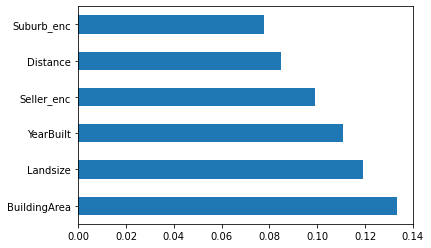

In [48]:
feature_importance = tree_based_feature_importance(x_df,y_df)

In [49]:
display(feature_importance)

,Features,Importances
6,BuildingArea,0.133390
5,Landsize,0.118943
7,YearBuilt,0.110827
25,Seller_enc,0.098935
1,Distance,0.084662
26,Suburb_enc,0.077573
8,Propertycount,0.075623
2,Postcode,0.070688
4,Car,0.052435
0,Rooms,0.041016


From the graph above we can see that top correlated variables are Building Area, Landsize, Year Built, Seller, Distance, and Suburb.


That's the variables that we need to consider when we are going to buy a home. Thank you very much.